In [1]:
import pymc3 as pm
import numpy as np
import scipy as sp
import pandas as pd
import common
import matplotlib.pyplot as plt
import theano
plt.rcParams["font.size"] = 18
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
observed_xs, observed_ys,  real_xs, real_ys = common.generate_observed_dataset()
shared_xs = theano.shared(observed_xs)
shared_ys = theano.shared(observed_ys)

print(observed_xs.shape)
print(observed_ys.shape)
print(real_xs.shape)
print(real_ys.shape)

(40, 1)
(40,)
(200,)
(200,)


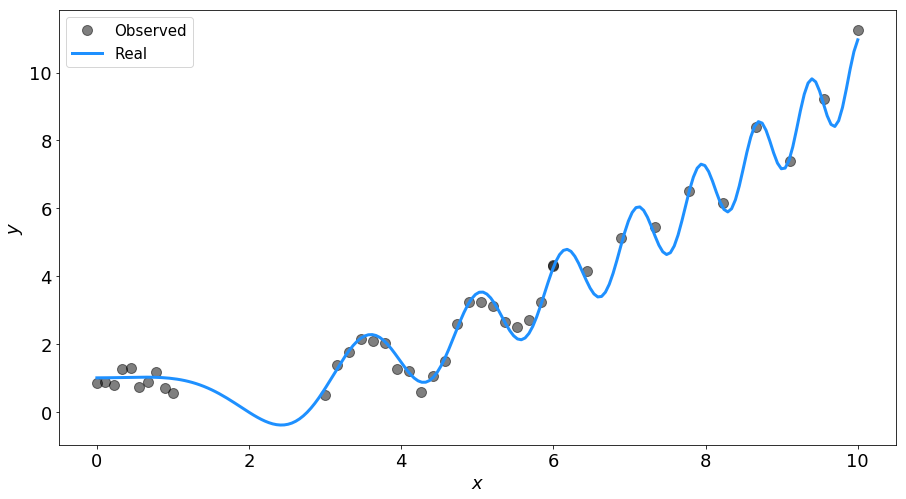

In [3]:
## Plot the data and the unobserved latent function
plt.figure(figsize=(15,8));
plt.plot(observed_xs, observed_ys, 'ok', ms=10, alpha=0.5, label="Observed");
plt.plot(real_xs, real_ys, "dodgerblue", lw=3, label="Real");
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.tick_params(labelsize=18)
plt.legend(loc="best", fontsize=15);

In [4]:
with pm.Model() as model:
    ℓ = pm.Gamma("ℓ", alpha=2, beta=1)
    η = pm.HalfCauchy("η", beta=5)

    cov = η**2 * pm.gp.cov.Matern52(1, ℓ)
    gp = pm.gp.Latent(cov_func=cov)

    f = gp.prior("f", X= observed_xs)

    σ = pm.HalfCauchy("σ", beta=5)
    ν = pm.Gamma("ν", alpha=2, beta=0.1)
    y_ = pm.StudentT("y", mu=f, lam=1.0/σ, nu=ν, observed=observed_ys)

    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ν, σ, f_rotated_, η, ℓ]
Sampling 2 chains: 100%|██████████| 3000/3000 [03:59<00:00, 12.55draws/s]
/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))
The acceptance probability does not match the target. It is 0.6280401694230869, bu

In [5]:
pm.summary(trace)

/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
f_rotated___0,0.169083,0.059730,0.002048,0.051386,0.293714,785.520790,0.999671
f_rotated___1,0.120410,0.281505,0.010476,-0.422155,0.665166,139.937167,1.005429
f_rotated___2,0.296024,0.684436,0.024393,-1.011499,1.535439,194.567092,1.006106
f_rotated___3,-0.119674,0.777971,0.022717,-1.764419,1.232195,615.319931,1.003649
f_rotated___4,-0.505939,0.898315,0.042556,-1.995906,1.282014,79.588639,1.012389
f_rotated___5,-0.027016,0.824748,0.021026,-1.594999,1.660770,1225.586500,1.001297
f_rotated___6,0.425980,0.883656,0.042985,-1.116804,2.110049,87.139448,1.003266
f_rotated___7,-0.205995,0.785031,0.019613,-1.731873,1.334887,1193.346427,0.999502
f_rotated___8,-0.355551,0.848450,0.024260,-2.127664,1.205113,593.841292,1.010128
f_rotated___9,-0.160737,0.900693,0.025545,-1.817273,1.715051,751.143376,1.001697


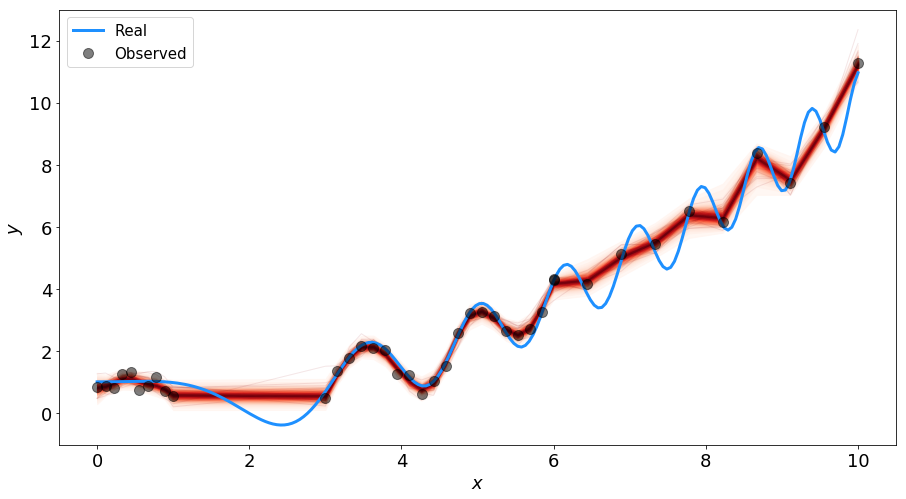

In [6]:
# plot the results
plt.figure(figsize=(15,8));

# plot the samples from the gp posterior with samples and shading
# fの事後確率を描画
from pymc3.gp.util import plot_gp_dist
plot_gp_dist(plt, trace["f"], observed_xs);

# plot the data and the true latent function
plt.plot(real_xs, real_ys, "dodgerblue", lw=3, label="Real");
plt.plot(observed_xs, observed_ys, 'ok', ms=10, alpha=0.5, label="Observed");

# axis labels and title
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.tick_params(labelsize=18)
plt.legend(loc="best", fontsize=15);

In [7]:
# 200 new values from x=0 to x=15
n_new = 200
X_new = np.linspace(0, 15, n_new)[:,None]

# add the GP conditional to the model, given the new X values
# 条件付き確率を作る。
with model:
    f_pred = gp.conditional("f_pred", X_new)

# 上で作成した確率からサンプルする。
# Sample from the GP conditional distribution
with model:
    pred_samples = pm.sample_posterior_predictive(trace, vars=[f_pred], samples=1000)

100%|██████████| 1000/1000 [00:17<00:00, 58.24it/s]


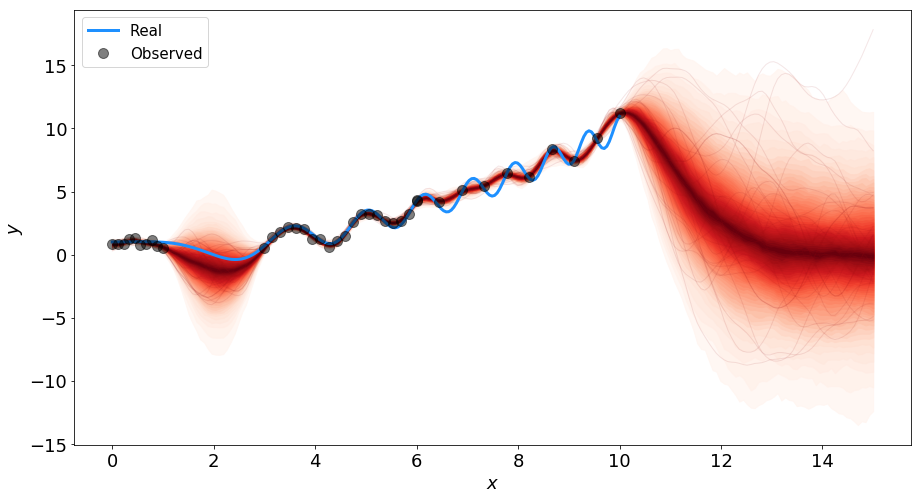

In [8]:
# plot the results
plt.figure(figsize=(15,8));
plot_gp_dist(plt, pred_samples["f_pred"], X_new)
plt.plot(real_xs, real_ys, "dodgerblue", lw=3, label="Real");
plt.plot(observed_xs, observed_ys, 'ok', ms=10, alpha=0.5, label="Observed")
plt.xlabel("$x$", fontsize=18) 
plt.ylabel("$y$", fontsize=18)
plt.tick_params(labelsize=18)
plt.legend(loc="best", fontsize=15)

In [9]:
with model:
    pred_samples = pm.sample_posterior_predictive(trace, vars=[y_], samples=1000)

100%|██████████| 1000/1000 [00:00<00:00, 2299.46it/s]


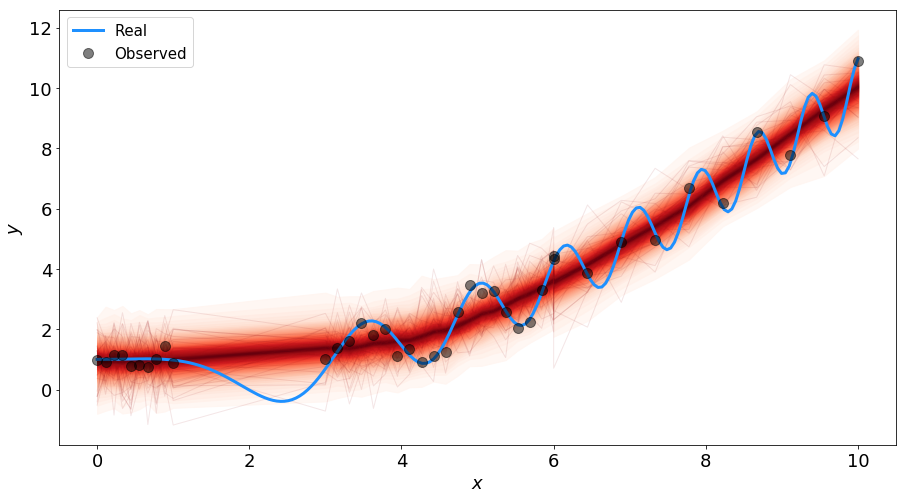

In [10]:
# plot the results
# pred_samples['y'].shape
plt.figure(figsize=(15,8));
plot_gp_dist(plt, pred_samples["y"], observed_xs);
plt.plot(real_xs, real_ys, "dodgerblue", lw=3, label="Real");
plt.plot(observed_xs, observed_ys, 'ok', ms=10, alpha=0.5, label="Observed")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.tick_params(labelsize=18)
plt.legend(loc="best", fontsize=15)